## Learning Notebook: From Logistic Regression to Neural Networks (CIFAR-10)

### Overview

This notebook is both an **exercise and a learning resource**. It will guide you through applying **logistic regression** and a **basic neural network** to the **CIFAR-10 image classification dataset**. You'll explore how neural networks build on classical techniques and why they perform better on complex data like images.

### Context

This notebook highlights the most important steps to build a very simple fully conntected Neural Network with couple of layers. You will have to prepare the data for the model, apply the right loss function, and the right optimizer. 

### Goal:
- Train a logistic regression classifier on CIFAR-10 using flattened image vectors
- Train a neural network with at least one hidden layer and compare its performance
- Experiment with different learning rates and compare the results
- Visualize and interpret confusion matrices and train/test loss curves
- (Optional) Experiment with different hidden layer sizes and observe how accuracy changes
- (Optional) Add a second hidden layer and evaluate the impact
- (Optional) try to add learning rate decay and dropout

Follow the Jupyter notebook below and answer the tasks marked as ✅ Task for Students.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [3]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

### Read and process the data

In [4]:
# Load CIFAR-10 dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
# flatten the output class 
y_train = y_train.flatten()
y_test = y_test.flatten()

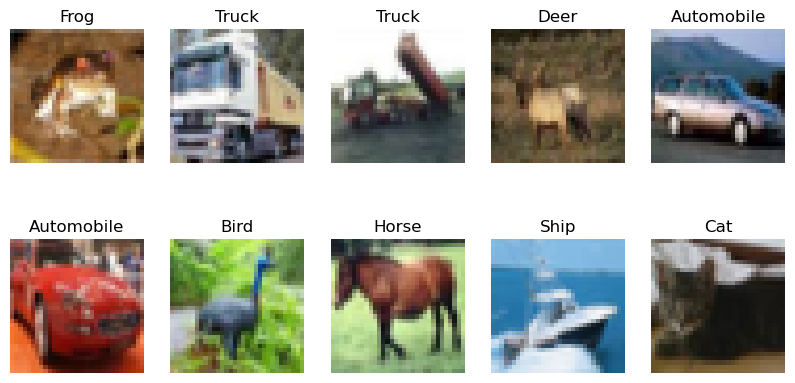

In [6]:
# Visualize Some input images with their classes
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [7]:
# Normalize the input vectors (min-max scaling)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [8]:
# Flatten the input since we will work with pixel values in the shape of vectors as input to FCNN
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [9]:
# One-hot encoding needed for the softmax function of the neural network
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### Build and train a logistic regression model

✅ Task for students: complete the following code by building a Logistic Regression using sklearn functions, train for 100 iterations.

In [10]:
# Subsample for logistic regression
n_samples = 10000  # or 1000 for faster results
MAX_ITER = 1000 # or 500 for faster results

# split to train and test
X_train_flat_sub = X_train_flat[:n_samples]
y_train_sub = y_train[:n_samples]


# code the logistic regression model and train it for 100 iterations, and try different solvers (at least two)
logreg = LogisticRegression(max_iter=MAX_ITER, solver='saga', verbose=1)
logreg.fit(X_train_flat_sub, y_train_sub)

Epoch 1, change: 1.00000000
Epoch 2, change: 0.31090999
Epoch 3, change: 0.17344742
Epoch 4, change: 0.13418563
Epoch 5, change: 0.11082496
Epoch 6, change: 0.09135544
Epoch 7, change: 0.08612490
Epoch 8, change: 0.07186170
Epoch 9, change: 0.06446969
Epoch 10, change: 0.05776449
Epoch 11, change: 0.05228228
Epoch 12, change: 0.04765991
Epoch 13, change: 0.04406381
Epoch 14, change: 0.04070324
Epoch 15, change: 0.03717916
Epoch 16, change: 0.03449593
Epoch 17, change: 0.03202178
Epoch 18, change: 0.03024725
Epoch 19, change: 0.02823303
Epoch 20, change: 0.02672739
Epoch 21, change: 0.02526999
Epoch 22, change: 0.02396887
Epoch 23, change: 0.02278775
Epoch 24, change: 0.02209350
Epoch 25, change: 0.02110103
Epoch 26, change: 0.01997373
Epoch 27, change: 0.01967697
Epoch 28, change: 0.01856786
Epoch 29, change: 0.01810975
Epoch 30, change: 0.01743570
Epoch 31, change: 0.01681903
Epoch 32, change: 0.01657792
Epoch 33, change: 0.01584461
Epoch 34, change: 0.01531897
Epoch 35, change: 0.014

/Users/mm/miniconda3/envs/DataMining/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='saga', verbose=1)

✅ Task for students: print the classification report on the complete test data and on the complete train data. Are the results better than random classifier?

In [11]:
y_train_pred_log = logreg.predict(X_train_flat)
y_test_pred_log = logreg.predict(X_test_flat)

print(
    "Train data repot:\n", classification_report(y_train, y_train_pred_log)
)

print(
    "Test data repot:\n", classification_report(y_test, y_test_pred_log)
)

Train data repot:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46      5000
           1       0.48      0.46      0.47      5000
           2       0.33      0.32      0.33      5000
           3       0.30      0.29      0.30      5000
           4       0.36      0.35      0.36      5000
           5       0.34      0.31      0.32      5000
           6       0.41      0.42      0.41      5000
           7       0.44      0.44      0.44      5000
           8       0.47      0.54      0.50      5000
           9       0.46      0.44      0.45      5000

    accuracy                           0.41     50000
   macro avg       0.40      0.41      0.40     50000
weighted avg       0.40      0.41      0.40     50000

Test data repot:
               precision    recall  f1-score   support

           0       0.41      0.39      0.40      1000
           1       0.40      0.38      0.39      1000
           2       0.25      0.25      0.

✅ Task for students: plot the Confusion Matrices for the logistic regression 

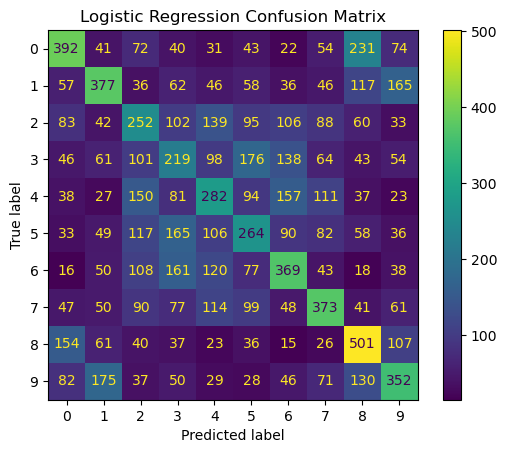

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_log)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

### Build and train a Neural Network

### Build the neural network model

The model can contain several hidden layers, and as it generates **multinomial classifications** of the input images, we need to apply the **softmax function** to the output logits. 


### Neural Network Architecture Summary

Build  a **simple feedforward neural network** for image classification on CIFAR-10. Add the following layers:

1. **Input Layer (Flatten)**

   * Converts each input image from shape **(32, 32, 3)** into a **1D vector of size 3072** (32 × 32 × 3).
   * This prepares the image data for fully connected layers.

2. **Hidden Layer (Dense)**

   * A fully connected layer with **128 neurons**.
   * Uses the **ReLU** activation function to introduce non-linearity.

3. **Output Layer (Dense)**

   * A fully connected layer with **10 neurons**, one for each class in CIFAR-10.
   * Uses **softmax** activation to output a probability distribution over the 10 classes.


#### What is the Softmax Function?

The **softmax function** is a normalized exponential function that maps a vector of continuous values (logits) into a vector of probabilities, ensuring that:
- All probabilities are non-negative.
- The sum of the probabilities equals 1.

#### Softmax Equation
The softmax function is defined as:

$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}$$

Where:
- \( $z_i$): Logit (input to the softmax function) for class (i).
- \( $N$): Total number of classes.
- \( $e^{z_i}$): Exponential of the logit for class (i).
- \( $\sigma(z_i)$): Probability for class (i).

---

#### Example Input and Output

Let’s consider a vector of logits \( z \) for a 10-class problem:


$$z = [2.0, 1.0, 0.1, -1.0, 0.5, -0.2, 1.5, -0.5, 0.3, -1.5]$$

Using the softmax function, we calculate the probabilities:

1. Compute ($e^{z_i}$) for each ( $z_i$):

   $$e^z = [7.39, 2.72, 1.11, 0.37, 1.65, 0.82, 4.48, 0.61, 1.35, 0.22]$$


2. Compute the sum of all exponentials:

   $$\text{Sum} = 20.72$$

3. Normalize each exponential by dividing by the sum:

   $$\sigma(z) = \frac{e^z}{\text{Sum}} = [0.356, 0.131, 0.054, 0.018, 0.080, 0.039, 0.216, 0.030, 0.065, 0.011]$$

#### Final Probabilities
The output probabilities are:

$$[0.356, 0.131, 0.054, 0.018, 0.080, 0.039, 0.216, 0.030, 0.065, 0.011]$$

These probabilities sum up to 1 and can be interpreted as the likelihood of the input belonging to each class.

--- 

#### Use in Classification
The class with the highest probability (e.g., $\text{argmax}(\sigma(z))$) is the predicted class.


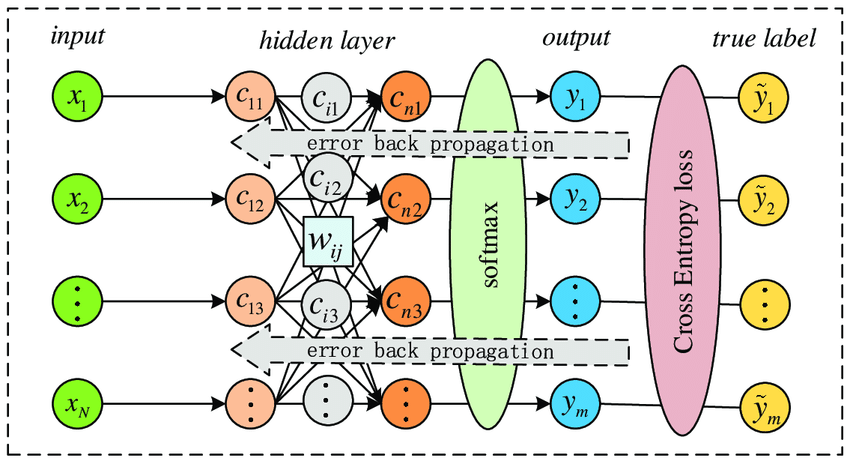

Zhou, Yangfan & Zhang, Mingchuan & Zhu, Junlong & Zheng, Ruijuan & Wu, Qingtao. (2019). MPCE: A Maximum Probability Based Cross Entropy Loss Function for Neural Network Classification. IEEE Access. PP. 1-1. 10.1109/ACCESS.2019.2946264. 

✅ Task for students: read the instructions above and code the mdoel using keras functions

In [13]:
# your code here
import keras
print("Build a Neural Network...")
nn = Sequential([
    keras.Input(shape=(32, 32, 3)), # Explicit input layer
    Flatten(), # However it should be flattened 
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

Build a Neural Network...


### Define the cost Function for Multinomial Classification in CIFAR-10


#### **Why Use `CategoricalCrossentropy`?**
   - CIFAR-10 is a dataset consisting of images belonging to **10 distinct classes**. For such problems, a multinomial (or multi-class) classification approach is required.
   - `CategoricalCrossentropy` is the standard loss function for measuring the difference between the predicted probability distribution over classes and the true class labels (one-hot encoded).

#### **Mathematical Explanation**
The `CategoricalCrossentropy` loss is calculated as:


$$ \text{Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{i,j} \cdot \log(\hat{y}_{i,j}) $$

Where:
- (N): Number of examples in the batch.
- (C): Number of classes (10 for CIFAR-10).
- ($y_{i,j}$): True label for class \(j\) (one-hot encoded: 1 for the correct class, 0 otherwise).
- \($hat{y}_{i,j}$): Predicted probability for class (j).

This formula penalizes the model more heavily when it assigns low probability to the correct class.

### Define the optimizer we want to use to find the model parameters during the training

#### **What is `SGD`?**

Stochastic Gradient Descent is a faster, more scalable version of standard Gradient Descent optimizer.  Instead of computing gradients on the entire dataset (as in GD), SGD updates model weights using just one training example (or a small batch) at a time.

#### **Why use it?**
- Faster updates → learns faster in early training

- Adds noise → helps escape local minima and explore better solutions

- Scales well to large datasets where full-batch GD is too slow

✅ Task for students: read the instructions above and add an SGD optimizer with 0.01 learning rate and a loss function for your NN model

In [14]:
from tensorflow.keras.optimizers import SGD

nn.compile(optimizer=SGD(learning_rate=0.001), 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

✅ Task for students: train the model for 50 epochs and plot how the test and train loss change during the training

In [15]:
# train the model
history = nn.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),  # Track test performance
    epochs=50,
    batch_size=64,
    verbose=1
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1914 - loss: 2.2251 - val_accuracy: 0.2866 - val_loss: 2.0484
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.2921 - loss: 2.0249 - val_accuracy: 0.3178 - val_loss: 1.9621
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.3202 - loss: 1.9472 - val_accuracy: 0.3359 - val_loss: 1.9139
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 704us/step - accuracy: 0.3381 - loss: 1.9061 - val_accuracy: 0.3470 - val_loss: 1.8805
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - accuracy: 0.3516 - loss: 1.8768 - val_accuracy: 0.3549 - val_loss: 1.8571
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.3619 - loss: 1.8486 - val_accuracy: 0.3665 - val_loss: 1.8346
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.3670 - loss: 1.8315 - val_accuracy: 0.3690 - val_loss: 1.8209
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step - accuracy: 0.3699 - loss: 1.8173 - va

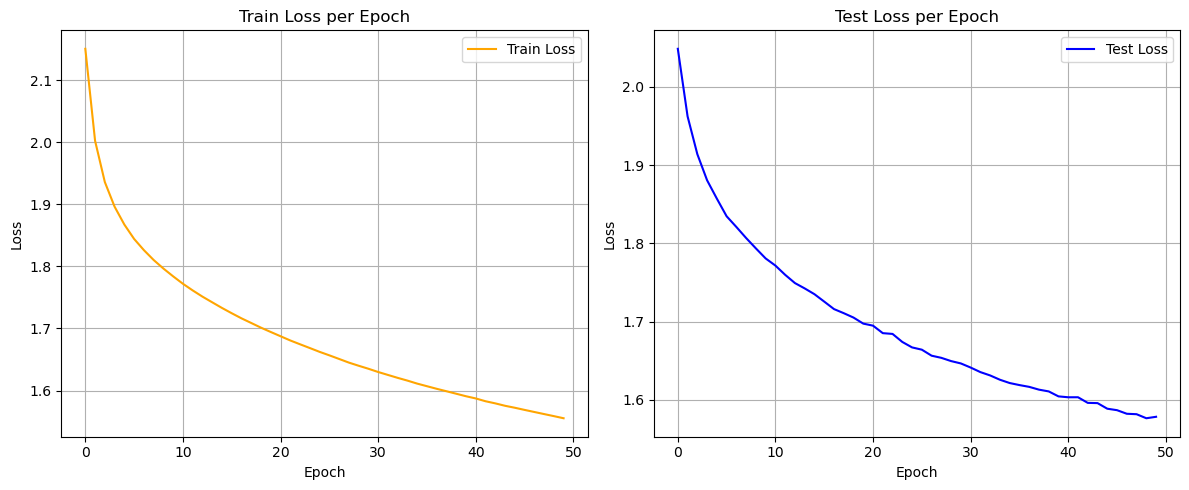

In [16]:
# plot the training by create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot Train Loss
axs[0].plot(history.history['loss'], label='Train Loss', color='orange')
axs[0].set_title('Train Loss per Epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot Test (Validation) Loss
axs[1].plot(history.history['val_loss'], label='Test Loss', color='blue')
axs[1].set_title('Test Loss per Epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

✅ Task for students: try different learning rates, 0.001, 0.01, 0.1 and explain what happened to the models train and test error. Write your observation below.

🔁 Remember: You must rebuild and recompile the model before training with each new learning rate. Reusing the same model can lead to misleading results.

In [17]:
answer = """
0.001: Training is stable but very slow, may underfit if we dont run for enough epochs

0.01: provides a good balance — converges well and generalizes effectively.

0.1: Too aggressive learning that may overshot the optimal model parameters — causes unstable training and poor test performance.
"""

✅ Task for students: predict class labels for the test data and print the classification report (remember that your models' output is a vector)

In [18]:
# Predict class labels
nn_preds = np.argmax(nn.predict(X_test), axis=1)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_preds))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step

Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1000
           1       0.54      0.51      0.53      1000
           2       0.31      0.33      0.32      1000
           3       0.37      0.23      0.28      1000
           4       0.36      0.44      0.40      1000
           5       0.39      0.31      0.35      1000
           6       0.45      0.54      0.49      1000
           7       0.52      0.45      0.48      1000
           8       0.50      0.65      0.56      1000
           9       0.50      0.49      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.44      0.45      0.44     10000
weighted avg       0.44      0.45      0.44     10000



✅ Task for students: plot the Confusion Matrices for the neural network

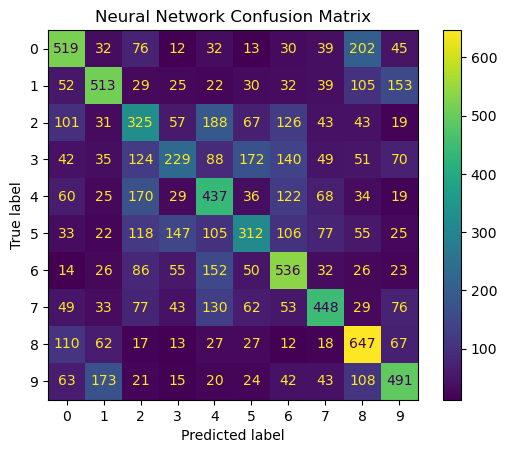

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, nn_preds)
plt.title("Neural Network Confusion Matrix")
plt.show()